In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/Data_Dicoding/rockpaperscissors/rockpaperscissors/rps-cv-images/'

print(os.listdir(path))

['paper', 'rock', 'scissors']


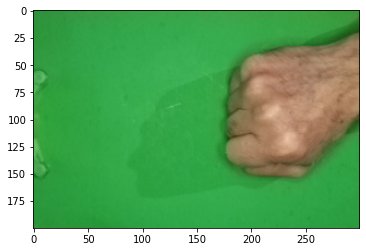

In [4]:
# ambil contoh visualisasi data rock ke 1
path_rock = path+'/rock'
img = mpimg.imread(path_rock + "/" + os.listdir(path_rock)[0])
plt.imshow(img)
plt.show()

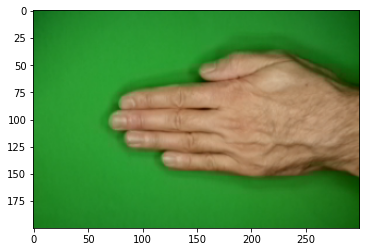

In [5]:
# ambil contoh visualisasi data paper ke 1
path_paper = path+'/paper'
img = mpimg.imread(path_paper + "/" + os.listdir(path_paper)[0])
plt.imshow(img)
plt.show()

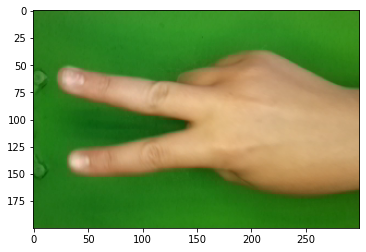

In [6]:
# ambil contoh visualisasi data scissors ke 1
path_scissors = path+'/scissors'
img = mpimg.imread(path_scissors + "/" + os.listdir(path_scissors)[0])
plt.imshow(img)
plt.show()

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                              rotation_range=40,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=[0.5,1.5],
                              brightness_range=[0.5,1.5],
                              horizontal_flip=True,
                              vertical_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

train_generator = train_datagen.flow_from_directory(path, target_size=(200, 300), batch_size=128, class_mode='categorical', subset='training')

val_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

val_generator = val_datagen.flow_from_directory(path, target_size=(200, 300), batch_size=32, class_mode='categorical', subset='validation')

Found 1766 images belonging to 3 classes.
Found 440 images belonging to 3 classes.


In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(200, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')
                             ])

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
fit_model = model.fit(train_generator,
                      steps_per_epoch=train_generator.samples/train_generator.batch_size - 1,
                      epochs=15,
                      validation_data=val_generator,
                      validation_steps=val_generator.samples/val_generator.batch_size - 1,
                      verbose=1,
                      callbacks=[callback])
fit_model

Epoch 1/15
13/12 [==============================] - 116s 9s/step - loss: 1.0934 - accuracy: 0.3913 - val_loss: 1.1327 - val_accuracy: 0.3221
Epoch 2/15
13/12 [==============================] - 118s 9s/step - loss: 1.0807 - accuracy: 0.4396 - val_loss: 1.0046 - val_accuracy: 0.4736
Epoch 3/15
13/12 [==============================] - 115s 9s/step - loss: 0.9378 - accuracy: 0.5519 - val_loss: 0.6478 - val_accuracy: 0.8534
Epoch 4/15
13/12 [==============================] - 115s 9s/step - loss: 0.7172 - accuracy: 0.6966 - val_loss: 0.4929 - val_accuracy: 0.7909
Epoch 5/15
13/12 [==============================] - 114s 9s/step - loss: 0.6155 - accuracy: 0.7515 - val_loss: 0.3962 - val_accuracy: 0.8365
Epoch 6/15
13/12 [==============================] - 114s 9s/step - loss: 0.5598 - accuracy: 0.7772 - val_loss: 0.3722 - val_accuracy: 0.8606
Epoch 7/15
13/12 [==============================] - 116s 9s/step - loss: 0.3994 - accuracy: 0.8578 - val_loss: 0.2045 - val_accuracy: 0.9303
Epoch 8/15
13

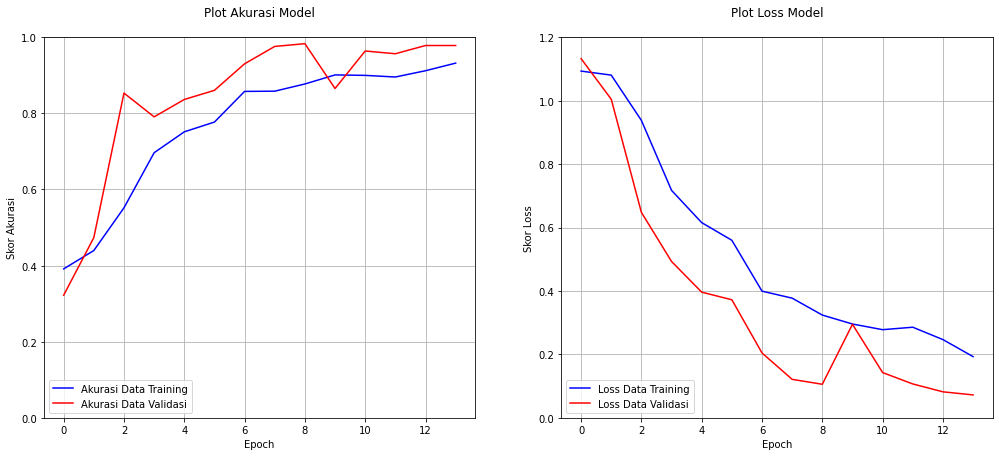

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(17, 7))

ax[0].plot(fit_model.history['accuracy'], color='blue', label='Akurasi Data Training')
ax[0].plot(fit_model.history['val_accuracy'], color='red', label='Akurasi Data Validasi')
ax[0].set_title('Plot Akurasi Model\n')
ax[0].legend(loc=3)
ax[0].set_ylim(0,1)
ax[0].grid(True)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Skor Akurasi')

ax[1].plot(fit_model.history['loss'], color='blue', label='Loss Data Training')
ax[1].plot(fit_model.history['val_loss'], color='red', label='Loss Data Validasi')
ax[1].set_title('Plot Loss Model\n')
ax[1].legend(loc=3)
ax[1].set_ylim(0,1.2)
ax[1].grid(True)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Skor Loss')

plt.show()

In [14]:
print('Nilai maksimum akurasi data training: ', np.max(fit_model.history['accuracy']))
print('Nilai maksimum akurasi data validasi: ', np.max(fit_model.history['val_accuracy']))

Nilai maksimum akurasi data training:  0.9320913553237915
Nilai maksimum akurasi data validasi:  0.9831730723381042


In [15]:
classes = ['rock', 'paper', 'scissors']
label = train_generator.class_indices
print(label)

{'paper': 0, 'rock': 1, 'scissors': 2}


In [23]:
def test_image(uploaded):
  for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(200,300))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    classes = pred.argmax(axis=-1)
    
    print(fn)
    if classes==2:
      print('scissors')
    elif classes==1:
      print('rock')
    elif classes==0:
      print('paper')

Saving 1lEpWTJDphkm3HdC.png to 1lEpWTJDphkm3HdC.png
1lEpWTJDphkm3HdC.png
scissors


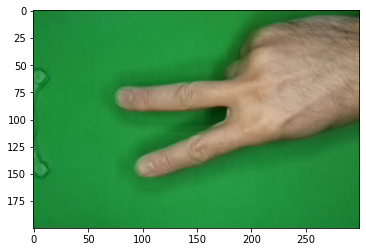

In [24]:
uploaded = files.upload()
test_image(uploaded)

Saving 622147.jpg to 622147.jpg
622147.jpg
scissors


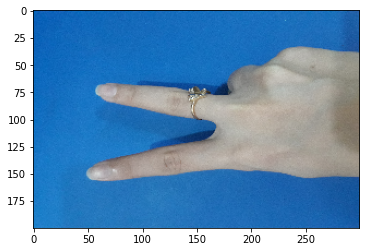

In [29]:
uploaded = files.upload()
test_image(uploaded)

Saving 2PAcPusQ59xIMfiw.png to 2PAcPusQ59xIMfiw.png
2PAcPusQ59xIMfiw.png
paper


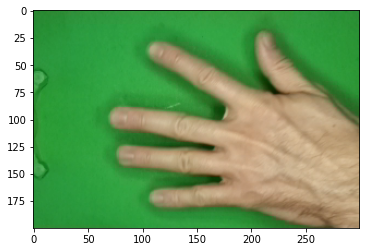

In [25]:
uploaded = files.upload()
test_image(uploaded)

Saving 622144.jpg to 622144.jpg
622144.jpg
paper


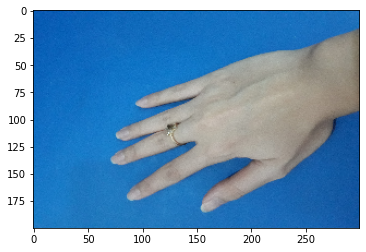

In [30]:
uploaded = files.upload()
test_image(uploaded)

Saving 1VoYiUgPE6h45MLu.png to 1VoYiUgPE6h45MLu.png
1VoYiUgPE6h45MLu.png
rock


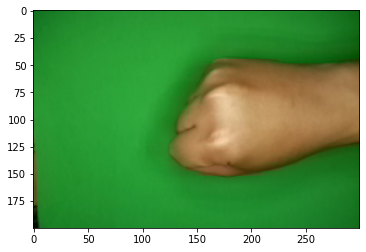

In [36]:
uploaded = files.upload()
test_image(uploaded)

Saving 622142.jpg to 622142.jpg
622142.jpg
rock


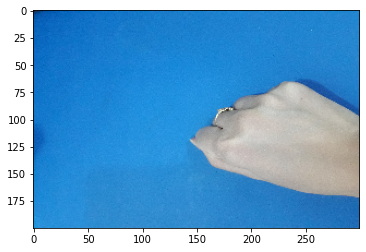

In [37]:
uploaded = files.upload()
test_image(uploaded)